In [48]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#ingore warning
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import interact

# for date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


# setting up the background style for the plots
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 



In [2]:
# lets import the dataset using the read_csv function
data = pd.read_csv('c:creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# lets check the shape of the dataset
data.shape

(284807, 31)

In [4]:
# lets check the column names present in the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#for numercial data
data.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
# checking no. of Missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
normal = data[data.Class==0]
fraud = data[data.Class==1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
data.groupby('Class').mean().style.background_gradient(cmap='cividis')
#1=Fraud Transaction
#0=Fraud Transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
normal_sample = normal.sample(n=492)

In [14]:
normal_sample.shape

(492, 31)

Using Under -Sampling method

In [15]:
new_data=pd.concat([normal_sample,fraud],axis=0)

In [16]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56025,47243.0,-0.816746,0.356333,1.680373,-0.879224,-1.079795,0.271831,-0.469482,0.766416,0.704791,...,0.384047,1.144297,-0.117475,0.048701,-0.086761,-0.412718,0.088153,0.059378,50.00,0
250577,154978.0,0.013510,0.750598,0.139029,-0.794814,0.665924,-0.512892,0.834117,0.021440,-0.200276,...,-0.235055,-0.550502,0.018174,-0.486490,-0.498415,0.152451,0.242989,0.081692,0.89,0
221549,142606.0,1.824009,-0.927934,-0.376237,0.161429,-0.664074,0.609094,-1.039845,0.368005,1.336100,...,0.083643,0.075435,0.202927,0.077609,-0.576775,0.353705,-0.036954,-0.034308,89.80,0
237868,149435.0,-0.912494,1.509319,-3.004712,-2.150790,2.933994,2.629486,0.342120,1.475749,-0.699600,...,0.296424,0.755862,-0.095099,0.749324,-0.174361,0.118668,0.269620,0.198293,0.76,0
74913,55810.0,-0.848540,0.241890,1.775466,1.520227,-1.146165,1.835810,0.593199,0.414400,0.728328,...,-0.336752,-0.473341,0.103090,-0.339976,-0.431704,-0.441305,0.099205,0.061550,203.49,0


In [17]:
new_data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

The above data is balanced now .Lets move towards machine learning models

In [18]:
X=new_data.drop(columns='Class',axis=1)
y=new_data["Class"]

In [19]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , y , test_size = 0.2 , random_state = 4)

In [20]:
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [21]:
model = RandomForestClassifier()
model.fit(Xtrain , Ytrain)

RandomForestClassifier()

In [22]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))
print("training acc" , model.score(Xtrain , Ytrain))


Testing Accuracy :  0.9543147208121827
training acc 1.0


In [23]:
predictions = model.predict(Xtest)

[[98  0]
 [ 9 90]]


<AxesSubplot:>

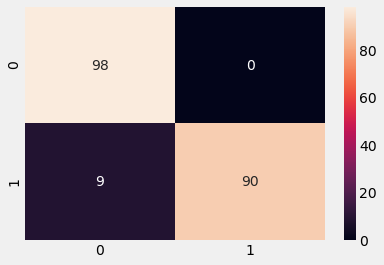

In [24]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

Using DecisionTreeClassifier 

In [25]:
model = DecisionTreeClassifier()
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier()

In [26]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.9137055837563451


In [27]:
predictions = model.predict(Xtest)

[[91  7]
 [10 89]]


<AxesSubplot:>

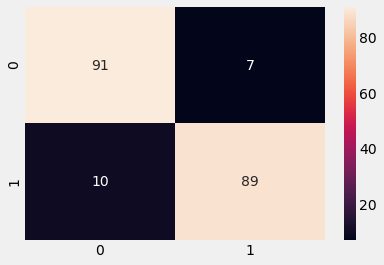

In [28]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

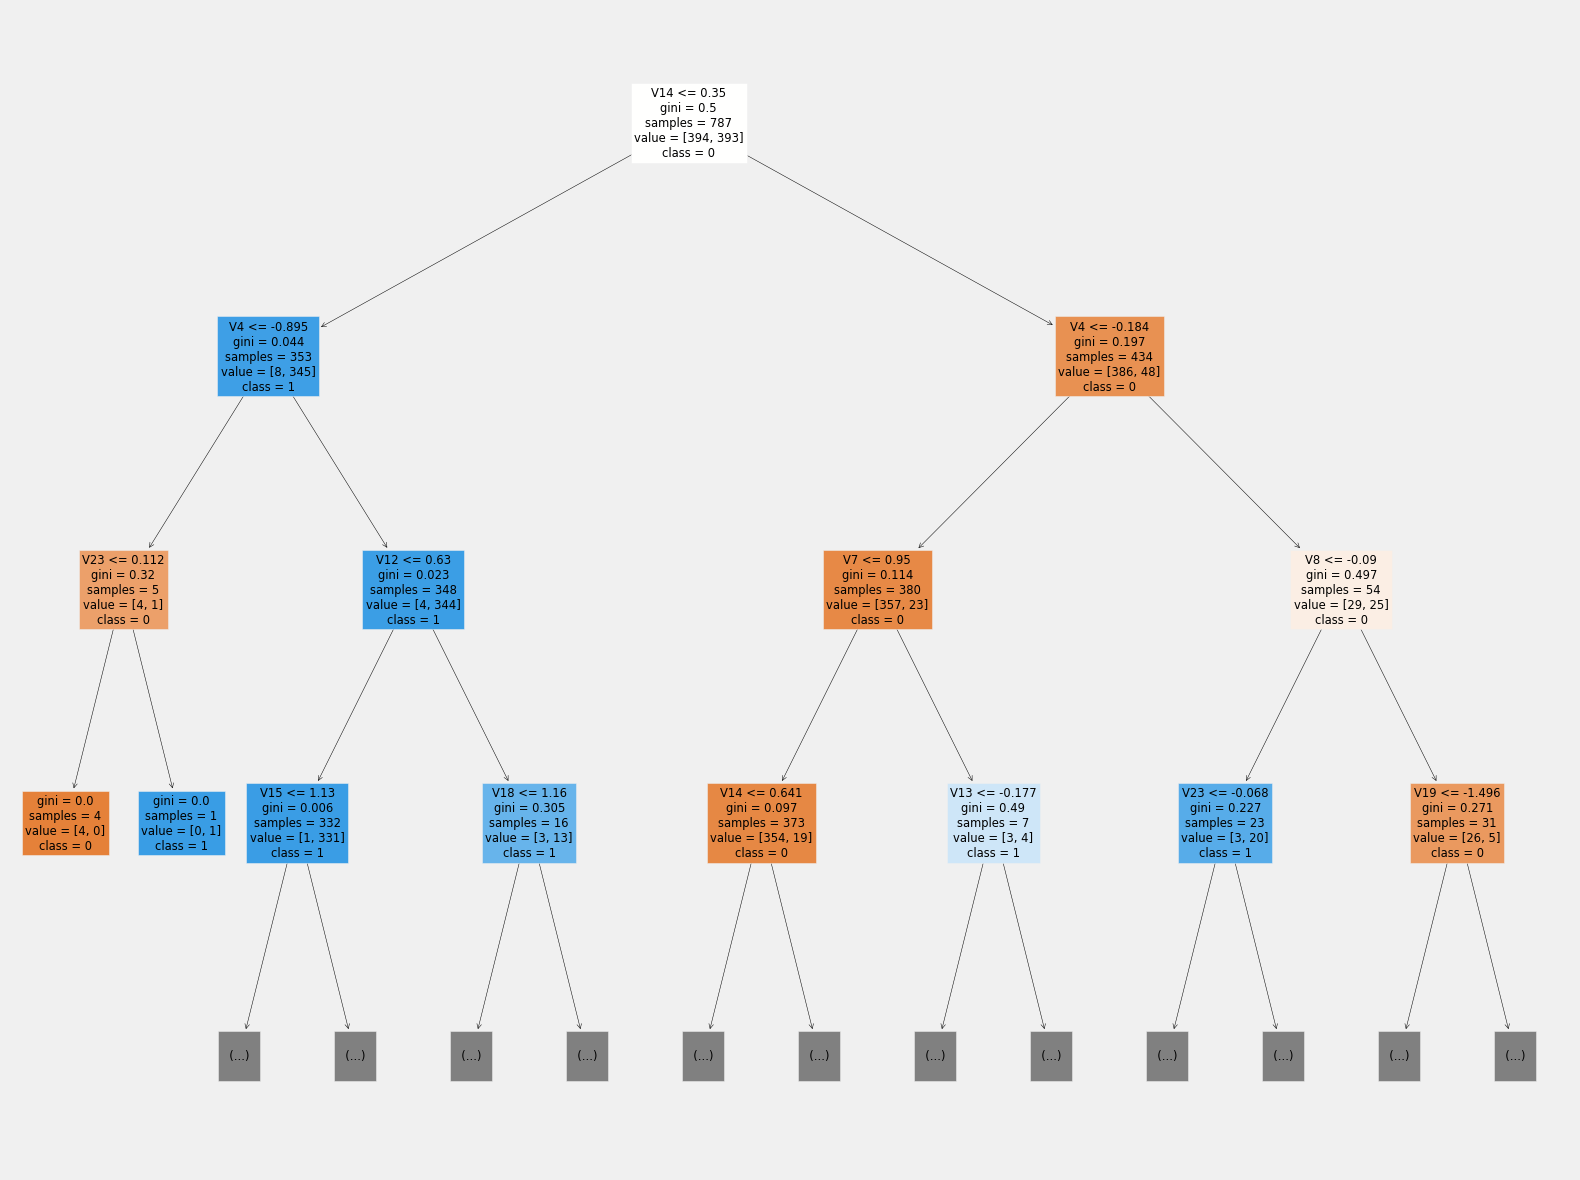

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   max_depth=3,
                   feature_names=data.columns[:-1],  
                   class_names=['0','1'],
                   filled=True)

Using KNeighborsClassifier


In [30]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the KNeighborsClassifier with a n_neighbors value of 1
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=1)

In [32]:
prediction = knn.predict(Xtest)
print("Testing Accuracy : " , knn.score(Xtest , Ytest))

Testing Accuracy :  0.8883248730964467


[[90  8]
 [14 85]]


<AxesSubplot:>

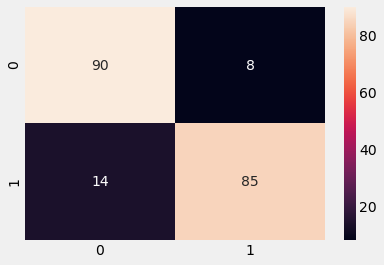

In [33]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , prediction)
print(matrix)
sns.heatmap(matrix , annot=True)

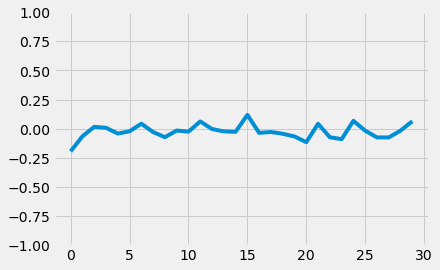

In [34]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

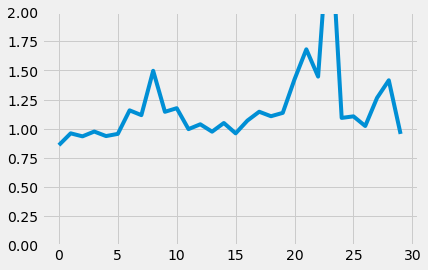

In [35]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [36]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)

predictions = model.predict(Xtest)

[[95  3]
 [ 7 92]]


<AxesSubplot:>

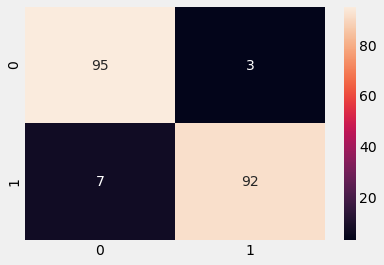

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [38]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))

Validation Accuracy :  0.949238578680203


In [39]:
# Checking precision 

print("Precision : " , precision_score(Ytest , predictions))

Precision :  0.968421052631579


In [40]:
# Checking recall 

print("Recall : " , recall_score(Ytest , predictions))

Recall :  0.9292929292929293


In [42]:
clf=XGBClassifier()
clf.fit(Xtrain,Ytrain)
y_predict=clf.predict(Xtest)

[22:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[[95  3]
 [10 89]]


<AxesSubplot:>

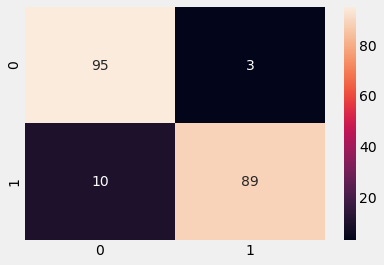

In [45]:
#Confusion metrics
cm=confusion_matrix(Ytest,y_predict)
print(cm)
sns.heatmap(cm, annot=True)

In [49]:
#Accuracy and classification report
print(accuracy_score(Ytest,y_predict))
print(classification_report(Ytest,y_predict))

0.934010152284264
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

